In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
import seaborn as sns
from wordcloud import WordCloud
import glob

# gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS

# spacy
import spacy
from nltk.corpus import stopwords

# viz
import pyLDAvis
import pyLDAvis.gensim_models

import nltk
nltk.download('stopwords')

C:\Users\david\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# using these parts of speech result in the best results
def lemmatization(texts, allowed_postags=["NOUN","ADJ","VERB","ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser","ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ". join(new_text)
        texts_out.append(final)
    return texts_out

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
trans_reviews = pd.read_csv('olist_order_reviews_dataset_with_translation.csv',error_bad_lines=False)

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Only care about records that have reviews
trans_reviews = trans_reviews[trans_reviews['review_comment_message_english'].notna()]
trans_reviews

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_title_english,review_comment_message_english
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,NaN,I received well before the stipulated deadline.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,NaN,Congratulations LANNISTER stores I loved to bu...
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,I recommend,efficient device. on the site the mark of the ...
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,NaN,"But a little, catching ... for the value is go..."
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,Super recommend,"Reliable seller, product ok and delivery befor..."
...,...,...,...,...,...,...,...,...,...
99205,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,2017-11-30 15:52:51,NaN,For this product I received according to the p...
99208,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,NaN,Delivered within the deadline. The product has...
99215,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06,NaN,"The product was not sent with NF, there is no ..."
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,NaN,"Excellent backpack, super fast delivery. Super..."


In [5]:
# remove stop words
stop = stopwords.words('english')
trans_reviews['review_comment_message_english'] = trans_reviews['review_comment_message_english'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# lemmatization
trans_reviews['review_comment_message_english'] = trans_reviews['review_comment_message_english'].astype(str)
trans_reviews['processed_reviews'] = lemmatization(trans_reviews['review_comment_message_english'])

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return final

trans_reviews['processed_reviews'] = gen_words(trans_reviews['processed_reviews'])
trans_reviews['processed_reviews']

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3                    [receive, well, stipulated, deadline]
4        [store, love, buy, internet, safe, practical, ...
9        [efficient, device, site, mark, device, print,...
12                            [little, catch, value, good]
15             [reliable, seller, product, delivery, time]
                               ...                        
99205           [product, receive, accord, purchase, hold]
99208    [deliver, deadline, product, reach, perfect, c...
99215    [product, send, sale, be, sure, be, wait, send...
99221    [excellent, backpack, super, fast, delivery, s...
99223    [product, arrive, already, return, defective, ...
Name: processed_reviews, Length: 40950, dtype: object

In [8]:
# bigrams and trigrams, so we can recognise a collection of words
bigram_phrases = gensim.models.Phrases(trans_reviews['processed_reviews'], min_count=5,threshold=50)
trigram_phrases = gensim.models.Phrases(bigram_phrases[trans_reviews['processed_reviews']],threshold=50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return ([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(trans_reviews['processed_reviews'])
data_bigrams_trigrams = make_trigrams(data_bigrams)

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# TF-IDF removal, remove low value words
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words + words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]
    
    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# train the topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word,mds="mmds",R=20)
vis

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.404265  0.259673       1        1  32.324075
5      0.116432  0.437358       2        1  15.416060
9     -0.345354 -0.260121       3        1   9.224416
1     -0.256533  0.403994       4        1   8.280306
6      0.191458 -0.426201       5        1   6.633003
7     -0.158537  0.149579       6        1   6.427108
3     -0.104379 -0.399688       7        1   6.004625
4     -0.460261  0.020602       8        1   5.736210
0      0.168979 -0.059033       9        1   5.133117
2      0.443930 -0.126162      10        1   4.821079, topic_info=           Term          Freq         Total Category  logprob  loglift
26      product  20108.000000  20108.000000  Default  20.0000  20.0000
22         good   6424.000000   6424.000000  Default  19.0000  19.0000
1       receive   6220.000000   6220.000000  Default  18.0000  18.0000
29         time   3350.000000   3350.000000  Default  17.0000  17.0000
4           buy   4758.000000   4758.000000  Default  16.0000  16.0000
...         ...           ...           ...      ...      ...      ...
110         son    111.875745    112.811991  Topic10  -4.6463   3.0238
905   get_touch    108.278206    109.214467  Topic10  -4.6789   3.0236
1356     strike    107.759539    108.695825  Topic10  -4.6837   3.0235
733        room     91.591471     92.527770  Topic10  -4.8463   3.0220
675    estimate     79.219459     80.155695  Topic10  -4.9914   3.0204

[220 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1093      6  0.995961         absurd
156       1  0.998167         accord
184       5  0.991517  advertisement
862       7  0.993626      afternoon
377       5  0.988852          again
...     ...       ...            ...
3         1  0.999728           well
170       9  0.999174           work
585       5  0.995741          worth
719       3  0.999059          wrong
62        2  0.999326            yet

[200 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 10, 2, 7, 8, 4, 5, 1, 3])

The code below was an exploration into using the model for practical classification, but there are limitations in conclusively labelling categories

In [12]:
# get most dominant class for each record
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=trans_reviews['review_comment_message_english']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    review_score = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=trans_reviews['review_comment_message_english'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.3589,"product, delivery, deadline, deliver, arrive, ...",NaN
1,1,8.0,0.2532,"product, delivery, deadline, deliver, arrive, ...",NaN
2,2,4.0,0.3011,"quality, right, site, date, package, correct, ...",NaN
3,3,8.0,0.3589,"product, delivery, deadline, deliver, arrive, ...",I received well stipulated deadline.
4,4,8.0,0.3456,"product, delivery, deadline, deliver, arrive, ...",Congratulations LANNISTER stores I loved buy i...
5,5,8.0,0.2718,"product, delivery, deadline, deliver, arrive, ...",NaN
6,6,8.0,0.3622,"product, delivery, deadline, deliver, arrive, ...",NaN
7,7,8.0,0.3189,"product, delivery, deadline, deliver, arrive, ...",NaN
8,8,8.0,0.2935,"product, delivery, deadline, deliver, arrive, ...",NaN
9,9,8.0,0.2872,"product, delivery, deadline, deliver, arrive, ...",efficient device. site mark device printed 3de...


In [13]:
trans_reviews_with_class = pd.merge(trans_reviews, df_dominant_topic, left_on='review_comment_message_english', right_on='Text', how='left')

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
poor_trans_reviews_with_class = trans_reviews_with_class[(trans_reviews_with_class['review_score'] == 1) & (trans_reviews_with_class['review_score'] == 1)]

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
poor_trans_reviews_with_class

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_title_english,review_comment_message_english,processed_reviews,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
6,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,My product has not arrived,Terrible,[terrible],19,8.0,0.4045,"product, delivery, deadline, deliver, arrive, ...",Terrible
7,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,My product has not arrived,Terrible,[terrible],22918,8.0,0.2918,"product, delivery, deadline, deliver, arrive, ...",Terrible
8,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,My product has not arrived,Terrible,[terrible],49365,NaN,NaN,NaN,Terrible
9,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,My product has not arrived,Terrible,[terrible],57967,NaN,NaN,NaN,Terrible
10,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,My product has not arrived,Terrible,[terrible],60162,NaN,NaN,NaN,Terrible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756581,9bab7509047d0b236205e330172b384d,e78cde66f03731202b0f5e082b0b0cff,1,NaN,Gostaria de saber porque meu produto ainda não...,2018-03-29 00:00:00,2018-03-29 22:21:55,NaN,I would like know product yet arrived residenc...,"[know, product, yet, arrive, residence, give, ...",99094,NaN,NaN,NaN,I would like know product yet arrived residenc...
757122,9ed2a6bc2282fd2b0105055631afa57f,a7db1b7bfec5e83a8fd33625e99f0d15,1,NaN,Ate hoje dia 21/10/2017 o pedido não foi entre...,2017-10-21 00:00:00,2017-10-21 18:51:37,NaN,"Until today 21/10/2017 request delivered, Amer...","[today, request, deliver, american, own, happe...",99141,NaN,NaN,NaN,"Until today 21/10/2017 request delivered, Amer..."
757129,2fc8295a24978092328d3a329d22940e,e809c167a9cfd31aee1293abe8995065,1,NaN,Eu recebi o seguinte email e preciso saber com...,2018-02-09 00:00:00,2018-02-13 13:03:24,NaN,I received following email I need know recover...,"[receive, follow, email, need, know, recover, ...",99155,NaN,NaN,NaN,I received following email I need know recover...
757135,3450ec3bbabeb09a08b00fc72da87a30,c46f950813dd2dd9bab4188dceb83175,1,NaN,Boa tarde. \r\nNão recebo todos os produtos fa...,2017-12-08 00:00:00,2017-12-08 19:07:00,NaN,Good afternoon. I get products missing comfort...,"[good, afternoon, get, product, miss, comfort,...",99169,NaN,NaN,NaN,Good afternoon. I get products missing comfort...


C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


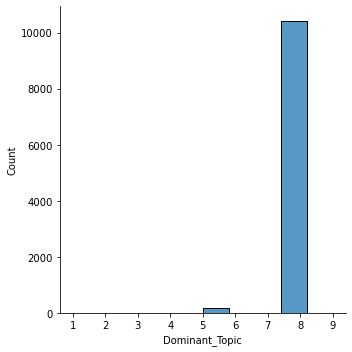

In [16]:
sns.displot(poor_trans_reviews_with_class['Dominant_Topic'], kde=False,bins=10)

In [17]:
# Rerun LDA Model to get topics for only poor reviews
trans_reviews = pd.read_csv('olist_order_reviews_dataset_with_translation.csv',error_bad_lines=False)

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Only care about records that have reviews
trans_reviews = trans_reviews[trans_reviews['review_comment_message_english'].notna()]
trans_reviews = trans_reviews[(trans_reviews['review_score'] == 1) | (trans_reviews['review_score'] == 2)]

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
stop = stopwords.words('english')
trans_reviews['review_comment_message_english'] = trans_reviews['review_comment_message_english'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# lemmatization
trans_reviews['review_comment_message_english'] = trans_reviews['review_comment_message_english'].astype(str)
trans_reviews['processed_reviews'] = lemmatization(trans_reviews['review_comment_message_english'])

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return final

trans_reviews['processed_reviews'] = gen_words(trans_reviews['processed_reviews'])
trans_reviews['processed_reviews']

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16       [know, happen, always, receive, purchase, deco...
19                                              [terrible]
29                                    [do, buy, cat, hare]
32       [always, buy, internet, delivery, occur, combi...
39                                          [get, request]
                               ...                        
99155    [receive, follow, email, need, know, recover, ...
99169    [good, afternoon, get, product, miss, comfort,...
99200    [very, different, photo, mainly, rala, synthet...
99203    [problem, delivery, mail, put, site, deliver, ...
99223    [product, arrive, already, return, defective, ...
Name: processed_reviews, Length: 10889, dtype: object

In [22]:
# bigrams and trigrams, so we can recognise a collection of words
bigram_phrases = gensim.models.Phrases(trans_reviews['processed_reviews'], min_count=5,threshold=50)
trigram_phrases = gensim.models.Phrases(bigram_phrases[trans_reviews['processed_reviews']],threshold=50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return ([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(trans_reviews['processed_reviews'])
data_bigrams_trigrams = make_trigrams(data_bigrams)

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# TF-IDF removal, remove low value words
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words + words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]
    
    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# train the topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word,mds="mmds",R=20)
vis

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.230897  0.423957       1        1  33.324031
3      0.163975 -0.432712       2        1  11.675055
9      0.205637  0.436731       3        1  10.830413
0     -0.243597 -0.386785       4        1   9.003706
6     -0.350556  0.149666       5        1   7.275229
7      0.152620  0.224298       6        1   7.136291
2      0.448603 -0.138913       7        1   6.237047
5     -0.392074 -0.113822       8        1   6.114192
1      0.277656 -0.006749       9        1   5.701173
8     -0.031366 -0.155671      10        1   2.702862, topic_info=               Term         Freq        Total Category  logprob  loglift
20          product  6775.000000  6775.000000  Default  20.0000  20.0000
7               buy  2447.000000  2447.000000  Default  19.0000  19.0000
95             come  1872.000000  1872.000000  Default  18.0000  18.0000
5           receive  4038.000000  4038.000000  Default  17.0000  17.0000
67           arrive  1182.000000  1182.000000  Default  16.0000  16.0000
...             ...          ...          ...      ...      ...      ...
51    reimbursement    25.892304    26.800389  Topic10  -4.5063   3.5764
2443           rise    24.505788    25.414194  Topic10  -4.5613   3.5745
1110     compatible    23.696761    24.604869  Topic10  -4.5949   3.5733
862           twice    23.239496    24.147638  Topic10  -4.6144   3.5725
744            shop    22.836895    23.744959  Topic10  -4.6318   3.5719

[220 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
620       5  0.987758    absurd
111       8  0.986991    accord
843       7  0.990541  addition
592      10  0.984337       ago
130       2  0.993039    almost
...     ...       ...       ...
206       8  0.988066      when
345       8  0.984861     white
66        6  0.995576      work
402      10  0.998296     wrong
21        1  0.998207       yet

[200 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 10, 1, 7, 8, 3, 6, 2, 9])

The code below was an exploration into using the model for practical classification, but there is a limitation in conclusively labelling categories

In [27]:
# get most dominant class for each record
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=trans_reviews['review_comment_message_english']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    review_score = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=trans_reviews['review_comment_message_english'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.4535,"product, receive, deliver, delivery, purchase,...",NaN
1,1,4.0,0.3278,"product, receive, deliver, delivery, purchase,...",NaN
2,2,4.0,0.2931,"product, receive, deliver, delivery, purchase,...",NaN
3,3,4.0,0.3295,"product, receive, deliver, delivery, purchase,...",NaN
4,4,4.0,0.3154,"product, receive, deliver, delivery, purchase,...",NaN
5,5,4.0,0.3066,"product, receive, deliver, delivery, purchase,...",NaN
6,6,9.0,0.2958,"arrive, already, far, time, order, site, invoi...",NaN
7,7,4.0,0.3513,"product, receive, deliver, delivery, purchase,...",NaN
8,8,4.0,0.3637,"product, receive, deliver, delivery, purchase,...",NaN
9,9,4.0,0.3287,"product, receive, deliver, delivery, purchase,...",NaN


C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


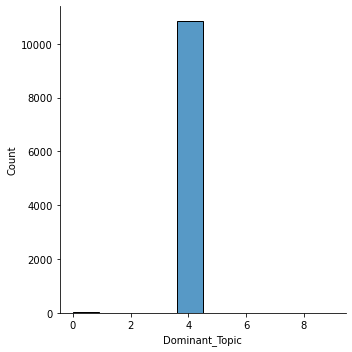

In [28]:
sns.displot(df_dominant_topic['Dominant_Topic'], kde=False,bins=10)

In [29]:
trans_reviews_with_class = pd.merge(trans_reviews, df_dominant_topic, left_on='review_comment_message_english', right_on='Text', how='left')

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


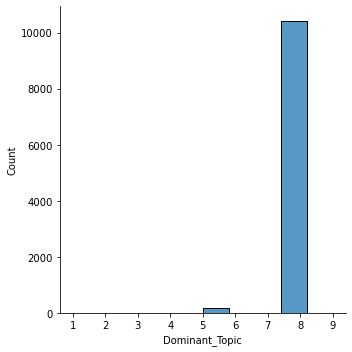

In [30]:
sns.displot(poor_trans_reviews_with_class['Dominant_Topic'], kde=False,bins=10)

In [31]:
Creation of word cloud

C:\Users\david\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-31-7e7e77426a7a>, line 1)

In [ ]:
trans_reviews = pd.read_csv('olist_order_reviews_dataset_with_translation.csv',error_bad_lines=False)
trans_reviews = trans_reviews[trans_reviews['review_comment_message_english'].notna()]

In [ ]:
allWords = ' '.join(trans_reviews['review_comment_message_english'])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()